# Estadística Inferencial - Pruebas de hipótesis

<a id="toc"></a>
## Contenido

- [Instrucciones Generales](#Instruciones-Generales)
- [Pruebas de hipótesis](#ph)  
  - [Prueba de hipótesis para la media cuando se muestrea una población normal con varianza conocida](#phz)
  - [Error de Tipo I ($\alpha$), Tipo II ($\beta$) y poder de la prueba (power=$1-\beta$)](#beta)
  - [Prueba de hipótesis para la media cuando se muestrea una población normal con varianza desconocida](#pht)
  - [Prueba t para datos pareados](#pairedtest)
  - [Prueba de hipótesis para la diferencia de medias cuando se muestrean dos poblaciones normales independientes con varianzas desconocidas pero iguales](#varnotequal)
  - [Prueba de hipótesis para la diferencia de medias cuando se muestrean dos poblaciones normales independientes cunado las varianzas no son iguales (Welch's t-test)](#welchttest)
  - [Prueba de hipótesis para las varianzas cuando se muestrean dos poblaciones normales independientes](#twovars)
  - [Prueba de hipótesis para la varianza cuando se muestrea una distribución normal](#onevar)
  - [Prueba de hipótesis para la proporción](#oneprop)
  - [Prueba de hipótesis para la diferencia de proporciones cuando se muestrean dos poblaciones independientes, no necesariamente normales, para muestras grandes ($n_X, n_Y \geq 30$) y varianzas conocidas](#twoprop)
  - [Prueba de Bondad de Ajuste](#chi2ba)
  - [Prueba de independecia Chi-cuadrado (Chi-Square Test of Independence)](#chi2ind)
  - [Resumen de fórmulas](#fph)

## Instruciones Generales

### Código

- Cuando aparezca esta imagen en el notebook, encontrará código Python que puede ser intermedio o avanzado. 

<img align="left" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/python-banner-300x89.png">

<br/>

### Opcional: Practique Python

<br/><br/>

  - **Esta sección es opcional**.
  - Concéntrense en los conceptos que se están tratando. 
  - Cuando se sienta cómodo con Python estudie el código. 

### Experimentación

- Cuando aparezca esta imagen en el notebook, encontrará instrucciones de actividades de experimentación a realizar de forma autónoma para reforzar los temas tratados. 
  - Esto puede ser cambiar un fragmento del código. 
  - O realizar análisis adicionales sobre los resultados presentados. 

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>
<br/>

<a id="ph"></a>
## Pruebas de hipótesis 

[Volver al índice](#toc)

- En la sección anterior, desarrollamos métodos estadísticos, en forma de intervalos de confianza, para responder a la pregunta ¿cuál es el valor del parámetro $\theta$?

- En esta sección, aprenderemos cómo responder una pregunta ligeramente diferente, ¿es el valor del parámetro $\theta$ tal o cuál? 
  - Por ejemplo, en lugar de intentar estimar $\mu$, la temperatura corporal media de los adultos, podríamos estar interesados en probar si $\mu$, la temperatura corporal media de los adultos es realmente de 37 grados centígrados. 
  - Intentaremos responder tales preguntas usando el método estadístico conocido como **prueba de hipótesis**.

- Realizaermos pruebas de hipótesis para los parámetros de población habituales, que incluyen:
  - la media poblacional, $\mu$;
  - la diferencia de dos poblaciones, $\mu_1 - \mu_2$;
  - la varianza poblacional, $\sigma^2$; 
  - la razón de dos varianzas poblacionales, $\frac{\sigma_1^2}{\sigma_2^2}$; 
  - la proporción poblacional, $p$; 
  - la diferencia en dos propociones poblacionales, $p_1 - p_2$.

- Partiremos de un ejemplo simple para presentar los pasos detrás de una prueba de hipótesis y luego nos enfocaremos en ejercicios para los diferentes casos. 
  - **Los supuestos, y estadísticos presentados para los intervalos de confianza aplican para las pruebas de hipótesis.**

<a id="phz"></a>
### Prueba de hipótesis para la media cuando se muestrea una población normal con varianza conocida

[Volver al índice](#toc)

**Paso 1:** Identificar el parámetro a evaluar: $\mu$ 

**Paso 2:** Formular la prueba de hipótesis.

| <div style="width:100px">Cola inferior</div>      | <div style="width:100px">Cola superior</div> | <div style="width:100px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \mu = \mu_0$     | $H_0:\ \mu = \mu_0$      | $H_0:\ \mu = \mu_0$  |
| $H_1:\ \mu < \mu_0$  | $H_1:\ \mu > \mu_0$        | $H_0:\ \mu \neq \mu_0$     |

**Paso 3:** Definir supuestos para seleccionar el estadístico de prueba.
  - Vea el intervalo de confianza equivalente.
  
 
  $$\hat{\mu} = \bar{X},\quad \frac{\bar{X}-\mu}{\sigma / \sqrt{n}} \sim N(0,1)$$

  
**Paso 4:** Calcular el estimador apropiado para el parámetro y el estadístico de prueba $z_p$, bajo $H_0$.

$$z_p = \frac{\bar{X}-\mu_0}{\sigma / \sqrt{n}}$$

**Paso 5:** Graficar la distribución del estadístico, identificar el punto crítico $z_c(\alpha)$ y la región crítica de acuerdo al **nivel de significancia** $\alpha$. 

**Paso 6:** Calcular y ubicar el estadístico de prueba en la gráfica de la distribución. 

**Paso 7:** Concluir

| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:200px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $z_p < z_{\alpha}$  | $z_p > z_{1-\alpha}$ | $z_p < z_{\alpha/2}$ o $z_p > z_{1-\alpha/2}$    |


### Ejemplo

Se toman los tiempos de armado de 20 piezas en una línea de ensamblaje (tiempos en segundos):

```Python
datos = np.array([9.8, 9.7, 9.6, 9.9, 10.5, 10.4, 9.9, 10.2, 11.2, 10.1, 10.6, 10.9, 10.3, 10.6, 10.5, 9.6, 11.1, 9.6, 9.8, 9.7])
```

Se define la variable aleatoria $X$ como el tiempo necesario para armar una unidad. Se asume que $X$ sigue una distribución $X \sim N(\mu, \sigma^2=0.6^2)$. Es decir una desviación $\sigma=0.6$.

Con un **nivel de significancia ($\alpha$) del 5%**, ¿existe alguna razón para pensar que el **tiempo medio de armado es mayor que 10 segundos**?

**Paso 1:** Identificar el parámetro a evaluar: $\mu$.

**Paso 2:** Formular la prueba de hipótesis.

| <div style="width:100px">Cola superior</div> | 
|    :----:   | 
| $H_0:\ \mu_0 = 10$      |
| $H_1:\ \mu_0 > 10$        | 


**Paso 3:** Definir supuestos para seleccionar el estadístico de prueba.
  - Vea el intervalo de confianza equivalente.
  
  $$\hat{\mu} = \bar{X},\quad \frac{\bar{X}-\mu_0}{\sigma / \sqrt{n}} \sim N(0,1)$$

**Paso 4:** Calcular el estimador apropiado para el parámetro y el estadístico de prueba $z_p$.

$$z_p = \frac{\bar{X}-\mu_0}{\sigma / \sqrt{n}} =  \frac{10.2-10}{0.6/\sqrt{20}}=1.4907.$$

- Bajo $H_0:\ \mu = 10$, el estadístico de prueba tiene un valor de $Z_p=1.4907$.

**Paso 5 y 6:** Identificar el punto crítico $z_{(1-\alpha)}=1.6449$ y la región crítica, y ubicar el estadístico de prueba $z_p=1.4907$, en la gráfica de la distribución.

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/z_test.png)

**Paso 7:** Concluir 

- Dado que no se cumple $z_p > z_{1-\alpha}$, no podemos rechazar $H_0$. 

| <div style="width:120px">Cola superior</div> | 
|    :----:   | 
| Recharzar $H_0$ cuando  | 
| $z_p > z_{1-\alpha}$ |

- **Conclusión:** No existe evidencia estadística que demuestre que el tiempo de ensamblaje promedio sea mayor a 10 segundos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform
from scipy.stats import norm

{'zp': 1.4907119849998547,
 'zc': 1.6448536269514722,
 'decision': 'No rechace H0'}

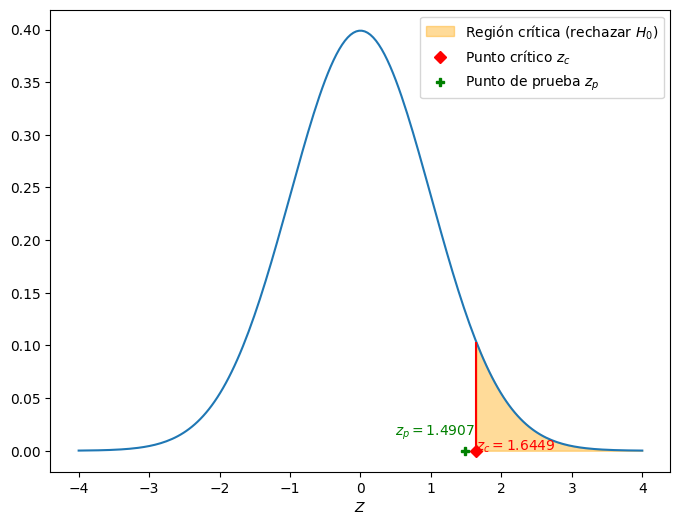

In [2]:
datos = np.array([9.8, 9.7, 9.6, 9.9, 10.5, 10.4, 9.9, 10.2, 11.2, 10.1, 
                  10.6, 10.9, 10.3, 10.6, 10.5, 9.6, 11.1, 9.6, 9.8, 9.7])
n = len(datos)  # tamaño de muestra
x_bar = datos.mean()  # media muestral x barra
mu = 10  # H_0, hipótesis nula
s = 0.6  # desviación poblacional conocida sigma
zp = (x_bar - mu) / (s/np.sqrt(n))  # estadístico de prueba

# Graficamos la distribución Z
x = np.linspace(-4, 4, 200)  # x a +- 4 desviaciones de la media
zx = norm.pdf(x)  # zx = N(0,1)
plt.figure(figsize=(8,6))
plt.plot(x, zx)

# Graficamos punto crítico y sombreamos región crítica
# cola superior de acuerdo a la hipótesis alternativa H1
alpha = 0.05  # nivel de significancia
zc = norm.ppf(1-alpha)  # punto crítico, cola superior z(1-alpha)
x_cola_superior = np.linspace(zc, 4)  # cola superior
plt.fill_between(x_cola_superior, norm.pdf(x_cola_superior), 
                 color="orange", alpha=.4, 
                 label=r"Región crítica (rechazar $H_0$)")
plt.vlines(zc, 0, norm.pdf(zc), 'r')
plt.plot(zc, 0, 'Dr', label=r"Punto crítico $z_c$")
plt.text(zc, 0, r'$z_c=$'+str(np.round(zc, 4)), color="red")

plt.plot(zp, 0, 'Pg', label=r"Punto de prueba $z_p$")
plt.text(zp-1, 0.015, r'$z_p=$'+str(np.round(zp, 4)), color="green")
plt.xlabel(r'$Z$')
l = plt.legend()

Conclusion = {False: "No rechace H0", True: "Rechace H0"}  # Para zp>zc
{'zp': zp, 'zc': zc, 'decision': Conclusion[zp>zc]}

### Ejemplo

Se sabe que los niños de cierta edad tienen un peso medio de $\mu=85$ libras. Se denuncia que los niños que viven en un hogar infantil municipal están desnutridos. Como evidencia, una muestra de n=25 niños (de la misma edad) se pesan, y se determina que tienen un peso medio de $\bar{x} = 80.94$ libras. 
Se sabe que la desviación estándar de la población es de $\sigma=11.6$ libras (¡la parte poco realista de este ejemplo!). 
- Con base en los datos disponibles, y con un nivel de significancia de $\alpha=0.05$, ¿qué se debe concluir con respecto a la denuncia?

$$H_0: \mu_0 = 85$$
$$H_1: \mu_0 < 85$$

{'zp': -1.750000000000001, 'zc': -1.6448536269514729, 'decision': 'Rechace H0'}

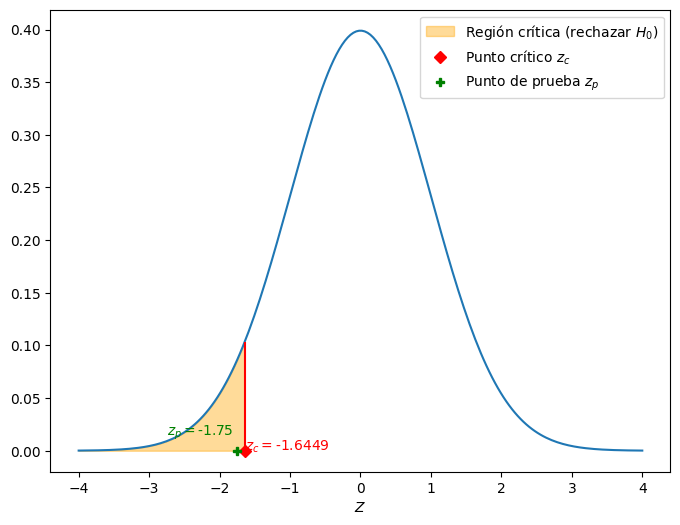

In [3]:
n = 25
x_bar = 80.94  # media muestral x barra
mu = 85  # H_0, hipótesis nula
s = 11.6  # desviación poblacional conocida sigma
zp = (x_bar - mu) / (s/np.sqrt(n))  # estadístico de prueba

# Graficamos la distribución Z
x = np.linspace(-4, 4, 200)  # x a +- 4 desviaciones de la media
zx = norm.pdf(x)  # zx = N(0,1)
plt.figure(figsize=(8,6))
plt.plot(x, zx)

# Graficamos punto crítico y sombreamos región crítica
# cola superior de acuerdo a la hipótesis alternativa H1
alpha = 0.05  # nivel de significancia
zc = norm.ppf(alpha)  # punto crítico, cola inferior z(alpha)
x_cola_inferior = np.linspace(-4, zc)  # cola inferior
plt.fill_between(x_cola_inferior, norm.pdf(x_cola_inferior), 
                 color="orange", alpha=.4, 
                 label=r"Región crítica (rechazar $H_0$)")
plt.vlines(zc, 0, norm.pdf(zc), 'r')
plt.plot(zc, 0, 'Dr', label=r"Punto crítico $z_c$")
plt.text(zc, 0, r'$z_c=$'+str(np.round(zc, 4)), color="red")

plt.plot(zp, 0, 'Pg', label=r"Punto de prueba $z_p$")
plt.text(zp-1, 0.015, r'$z_p=$'+str(np.round(zp, 4)), color="green")
plt.xlabel(r'$Z$')
l = plt.legend()

Conclusion = {False: "No rechace H0", True: "Rechace H0"}  # Para zp<zc
{'zp': zp, 'zc': zc, 'decision': Conclusion[zp<zc]}

- **Conclusión:** Existe evidencia estadística para afirmar que la media del peso de los niños que viven en el hogar infantil municipal es menor a 85 libras.

### Valor $p$ ($p$-value)

- El enfoque de la región crítica anterior, nos dice que rechacemos la hipótesis nula, al nivel de significancia $\alpha=0.05$. Dado que $z_p$ < $z_c$, y por tanto $z_p$, cae en la región de rechazo. 

- Podemos obtener la misma conclusión usando el enfoque del valor $p$ ($p$-value), si $p$-value $ \leq \alpha$.

- **El valor p:**

  - Es la probabilidad, bajo el supuesto de que la hipótesis nula es verdadera, de obtener un resultado igual o más extremo que el resultado obtenido en el experimento (el estadísdtico de prueba $z_p$).
  - En nuestro ejemplo de cola inferior esto se traduce como $p$-value$=P(Z<z_p)$
  - Para cola superior: $p$-value$=P(Z>z_p)$.
  - Para dos colas: $p$-value$=min(P({Z<z_p|H_0), P(Z>z_p|H_0)}) \cdot 2$.
    - En una prueba de dos colas, la traducción de "igual o más extremo que" es esencialmente igual o más distante, en cualquier dirección opuesta a la media. Estamos probando si la media se ha movido en cualquier dirección, en este caso.
    - Dada la simetría de la distribución, multiplicamos por 2 para obtener el $p$-value. 
  
### Ejemplo

- En nuestro ejemplo el $p$-value es $P(Z<z_p) = P(Z<-1.75) = 0.0401$.

- Dado que $p$-value $ \leq \alpha$, rechazamos $H_0$.

- **Representemos esto de forma gráfica.**

{'zp': -1.750000000000001, 'zc': -1.6448536269514729, 'decision': 'Rechace H0'}


{'p_value': 0.04005915686381699, 'alpha': 0.05, 'decision': 'Rechace H0'}

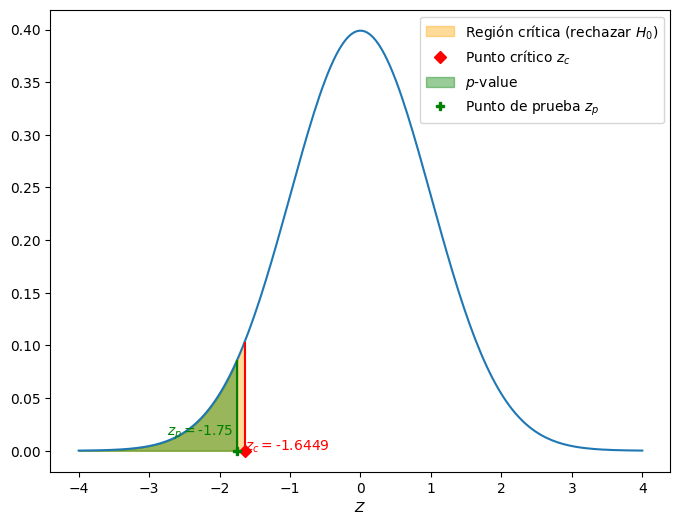

In [4]:
n = 25
x_bar = 80.94  # media muestral x barra
mu = 85  # H_0, hipótesis nula
s = 11.6  # desviación poblacional conocida sigma
zp = (x_bar - mu) / (s/np.sqrt(n))  # estadístico de prueba

# Graficamos la distribución X
x = np.linspace(-4, 4, 200)  # x a +- 4 desviaciones de la media
zx = norm.pdf(x)  # zx = N(0,1)
plt.figure(figsize=(8,6))
plt.plot(x, zx)

# Graficamos punto crítico y sombreamos región crítica
# cola superior de acuerdo a la hipótesis alternativa H1
alpha = 0.05  # nivel de significancia
zc = norm.ppf(alpha)  # punto crítico, cola inferior z(alpha)

p_value = norm.cdf(zp)  # valor p: P(Z<zp) = F(zp)

x_cola_inferior = np.linspace(-4, zc)  # cola inferior
plt.fill_between(x_cola_inferior, norm.pdf(x_cola_inferior), 
                 color="orange", alpha=.4, 
                 label=r"Región crítica (rechazar $H_0$)")
plt.vlines(zc, 0, norm.pdf(zc), 'r')
plt.plot(zc, 0, 'Dr', label=r"Punto crítico $z_c$")
plt.text(zc, 0, r'$z_c=$'+str(np.round(zc, 4)), color="red")

# p-value
x_p_value = np.linspace(-4, zp)  # cola inferior
plt.fill_between(x_p_value, norm.pdf(x_p_value), 
                 color="green", alpha=.4, 
                 label=r"$p$-value")
plt.vlines(zp, 0, norm.pdf(zp), 'g')
plt.plot(zp, 0, 'Pg', label=r"Punto de prueba $z_p$")
plt.text(zp-1, 0.015, r'$z_p=$'+str(np.round(zp, 4)), color="green")
plt.xlabel(r'$Z$')
l = plt.legend()

Conclusion = {False: "No rechace H0", True: "Rechace H0"}  # Para zp<zc
print({'zp': zp, 'zc': zc, 'decision': Conclusion[zp<zc]})
{'p_value': p_value, 'alpha': alpha, 'decision': Conclusion[p_value<alpha]}

- Un último enfoque, y misma conclusión, consiste en representar el problema usando la variable $\bar{X} \sim N(\mu, \sqrt{\sigma^2/n})$.
  - Note que el p-value es el mismo que obtuvimos para la variable estandarizada $Z\sim N(0,1)$.

{'xp': 80.94, 'xc': 81.18393958547259, 'decision': 'Rechace H0'}


{'p_value': 0.04005915686381699, 'alpha': 0.05, 'decision': 'Rechace H0'}

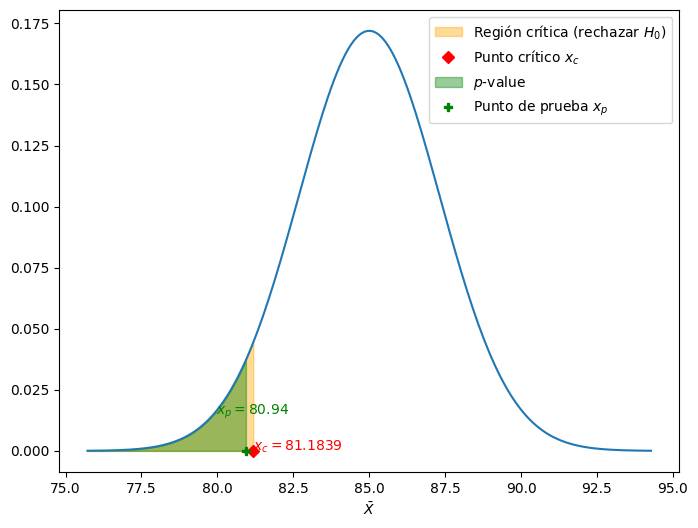

In [5]:
n = 25
x_bar = 80.94  # media muestral x barra
mu = 85  # H_0, hipótesis nula
s = 11.6  # desviacioón poblacional conocida sigma
se = s / np.sqrt(n)
xp = x_bar  # estadístico de prueba

# Graficamos la distribución X_bar
x = np.linspace(mu-4*se, mu+4*se, 200)  # x a +- 4 desviaciones de la media
pdfx = norm.pdf(x, mu, se)  # zx = N(0,1)
plt.figure(figsize=(8,6))
plt.plot(x, pdfx)

# Graficamos punto crítico y sombreamos región crítica
# cola superior de acuerdo a la hipótesis alternativa H1
alpha = 0.05  # nivel de significancia
xc = norm.ppf(alpha, mu, se)  # punto crítico, cola inferior z(alpha)

p_value = norm.cdf(xp, mu, se)  # valor p: P(X<xp) = F(xp)

x_cola_inferior = np.linspace(mu-4*se, xc)  # cola inferior
plt.fill_between(x_cola_inferior, norm.pdf(x_cola_inferior, mu, se), 
                 color="orange", alpha=.4, 
                 label=r"Región crítica (rechazar $H_0$)")
plt.vlines(xc, 0, norm.pdf(xc), 'r')
plt.plot(xc, 0, 'Dr', label=r"Punto crítico $x_c$")
plt.text(xc, 0, r'$x_c=$'+str(np.round(xc, 4)), color="red")

# p-value
x_p_value = np.linspace(mu-4*se, xp, mu, se)  # cola inferior
plt.fill_between(x_p_value, norm.pdf(x_p_value, mu, se), 
                 color="green", alpha=.4, 
                 label=r"$p$-value")
plt.vlines(xp, 0, norm.pdf(xp), 'g')
plt.plot(xp, 0, 'Pg', label=r"Punto de prueba $x_p$")
plt.text(xp-1, 0.015, r'$x_p=$'+str(np.round(xp, 4)), color="green")
plt.xlabel(r'$\bar{X}$')
l = plt.legend()

Conclusion = {False: "No rechace H0", True: "Rechace H0"}  # Para xp<xc
print({'xp': xp, 'xc': xc, 'decision': Conclusion[xp<xc]})
{'p_value': p_value, 'alpha': alpha, 'decision': Conclusion[p_value<alpha]}

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

- Calcule el $p$-value para el ejercicio de ensamblaje, tenga en cuenta que es un cálculo por la cola superior. 
  - ¿Cuál es la conclusión usando el $p$-value?
  
- Para el ejercicio de ensamblaje, exprese la solución en términos de $\bar{X}$, tenga en cuenta que es un cálculo por la cola superior. 
  - ¿Cuál es la conclusión?

<a id="beta"></a>
### Error de Tipo I ($\alpha$), Tipo II ($\beta$) y poder de la prueba (power=$1-\beta$)

[Volver al índice](#toc)

<table class="issArticleTable" style="width: 550px; height: 164px;" border="1" width="481" cellspacing="2" cellpadding="2" align="center"><tbody><tr><td style="text-align:center" class="issCaptionCell" colspan="3" bgcolor="#cccccc"><strong></strong> <strong>Posibles Resultados de una prueba de hipótesis</strong></td>
</tr><tr><td bgcolor="#cccccc"><strong></strong></td>
<td colspan="2" bgcolor="#cccccc" style="text-align:center">
<strong>Decisiones</strong>
</td>
</tr><tr><td><strong>Realidad</strong></td>
<td style="text-align:center">No rechazar $H_0$</td>
<td style="text-align:center">
Rechazar $H_0$
</td>
</tr>
<tr><td>$H_0$ es verdad</td>
<td style="text-align:center">Buena decisión ($P=1-\alpha$)</td>
<td style="text-align:center">
Error de tipo I ($P=\alpha$)
</td>
</tr>
 <tr><td valign="top">$H_0$ es falsa</td>
<td style="text-align:center">
Error de Tipo II ($P=\beta$)
</td>
<td style="text-align:center">
Buena decisión ($P=1 – \beta$, es el poder de la prueba.)
</td>
</tr></tbody></table>

### Ejemplo

- Suponga que vamos a realizar una muestra aleatoria de tamaño $n=36$ de una población distribuida $X \sim N(\mu, \sigma^2)$, donde $\sigma=21$ y $\mu$ es desconocida.

- Vamos a probar:

$$H_0: \mu_0=50$$
$$H_1: \mu_0 < 50$$

- Con un nivel de significancia de $\alpha=0.09$. 

- Si en realidad $\mu=40$, cual es la $P(\text{Error de tipo II})$. 

$$P(\text{Error de tipo II}) = P(\text{No rechazar } H_0 | \mu=40).$$

  - Vea: https://www.youtube.com/watch?v=BJZpx7Mdde4
  
- No es dificil calcular $\beta=P(\text{Error de tipo II}) = P(\text{No rechazar } H_0 | \mu=40)$ y el poder de la prueba (power=$1-\beta$), en la figura abajo. 

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/alfa_beta_power.png)

```Python
{'beta': 0.06471065809896848,
 'power': 0.9352893419010315}
```

- Piénselo un poco y luego analice el código a continuación. 
  - Vea una versión interactiva en: https://en-interactive.herokuapp.com/#/9/1

{'Valor crítico': 45.30735738208424,
 'beta': 0.06471065809896848,
 'power': 0.9352893419010315}

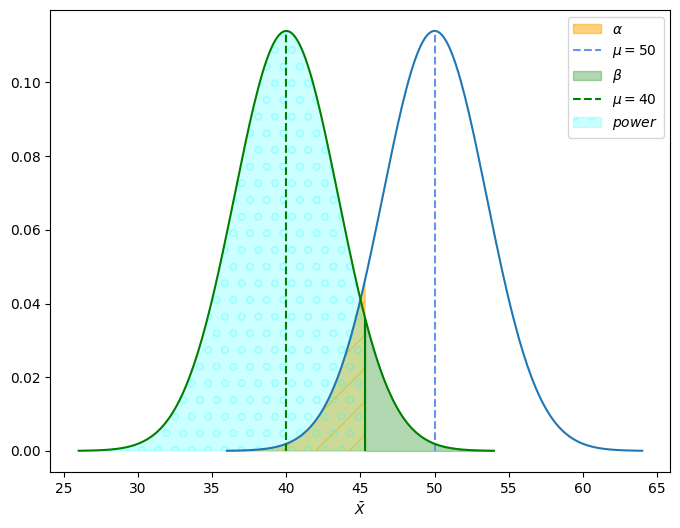

In [6]:
n = 36
mu = 50  # H_A, hipótesis nula
s = 21  # desviacioón poblacional conocida sigma
se = s / np.sqrt(n)

# Graficamos la distribución X
x = np.linspace(mu-4*se, mu+4*se, 200)  # x a +- 4 desviaciones de la media
pdfx = norm.pdf(x, mu, se)  # zx = N(0,1)
plt.figure(figsize=(8,6))
plt.plot(x, pdfx)

# Graficamos punto crítico y sombreamos región crítica
# cola superior de acuerdo a la hipótesis alternativa H1
alpha = 0.09  # nivel de significancia
xc = norm.ppf(alpha, mu, se)  # punto crítico, cola inferior z(alpha)

x_alpha = np.linspace(mu-4*se, xc)  # cola inferior
plt.fill_between(x_alpha, norm.pdf(x_alpha, mu, se), 
                 color="orange", alpha=.5, hatch='/',
                 label=r"$\alpha$")
plt.vlines(mu, 0, norm.pdf(mu, mu, se), 
           linestyles="dashed", color="cornflowerblue", label=r"$\mu=$"+str(mu))

mu1 = 40  # H_B, realidad

# Graficamos la distribución X
x = np.linspace(mu1-4*se, mu1+4*se, 200)  # x a +- 4 desviaciones de la media
pdfx = norm.pdf(x, mu1, se)  # zx = N(0,1)
plt.plot(x, pdfx, 'g')
plt.vlines(xc, 0, norm.pdf(xc, mu1, se), color="g")
x_beta = np.linspace(xc, mu1+4*se)  # beta
plt.fill_between(x_beta, norm.pdf(x_beta, mu1, se), 
                 color="green", alpha=.3,
                 label=r"$\beta$")
plt.vlines(mu1, 0, norm.pdf(mu1, mu1, se), 
           linestyles="dashed", color="green", label=r"$\mu=$"+str(mu1))

x_power = np.linspace(mu1-4*se, xc)  # power
plt.fill_between(x_power, norm.pdf(x_power, mu1, se), 
                 color="cyan", alpha=.2, hatch='o',
                 label=r"$power$")

plt.xlabel(r'$\bar{X}$')
l = plt.legend()
beta = 1-norm.cdf(xc, mu1, se) 
{"Valor crítico": xc, "beta": beta, "power": 1-beta}

<a id="pht"></a>
### Prueba de hipótesis para la media cuando se muestrea una población normal con varianza desconocida

[Volver al índice](#toc)

**Paso 1:** Identificar el parámetro a evaluar: $\mu$ 

**Paso 2:** Formular la prueba de hipótesis.

| <div style="width:100px">Cola inferior</div>      | <div style="width:100px">Cola superior</div> | <div style="width:100px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \mu = \mu_0$     | $H_0:\ \mu = \mu_0$      | $H_0:\ \mu = \mu_0$  |
| $H_1:\ \mu < \mu_0$  | $H_1:\ \mu > \mu_0$        | $H_0:\ \mu \neq \mu_0$     |

**Paso 3:** Definir supuestos para seleccionar el estadístico de prueba.
- Vea el intervalo de confianza equivalente.
  1. Variable aleatoria (población): $X \sim N(\mu, \sigma^2)$.
  2. Parámetros poblacionales: $\mu$ conocida ($H_0$), $\sigma^2$ desconocida. 
  3. Muestra aleatoria: $\bar{X}, n, s$, calculables a partir de la muestra aleatoria. 

**Paso 4:** Calcular el estimador apropiado para el parámetro y el estadístico de prueba $z_p$, bajo $H_0$.

$$\hat{\mu} = \bar{X},\quad t_p = \frac{\bar{X}-\mu_0}{s / \sqrt{n}} \sim t_{n-1}.$$

**Paso 5:** Graficar la distribución del estadístico, identificar el punto crítico $t_c(\alpha)$ y la región crítica de acuerdo al **nivel de significancia** $\alpha$. 

**Paso 6:** Calcular y ubicar el estadístico de prueba $t_p$ en la gráfica de la distribución. 

**Paso 7:** Concluir

| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:220px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $t_p < t_{(\alpha, n-1)}$  | $t_p > t_{(1-\alpha, n-1)}$ | $t_p < t_{(\alpha/2, n-1)}$ o $t_p > t_{(1-\alpha/2,n-1)}$    |


### Ejemplo

Hemos recolectado una muestra aleatoria de 31 barras energéticas de varias tiendas diferentes para representar la población de barras energéticas disponibles para el consumidor general. Las etiquetas de las barras afirman que cada barra contiene 20 gramos de proteína.

- Vea la [fuente](https://www.jmp.com/en_sg/statistics-knowledge-portal/t-test/one-sample-t-test.html).

```Python
muestra = np.array([20.70,27.46,22.15,19.85,21.29,24.75,
                    20.75,22.91,25.34,20.33,21.54,21.08,
                    22.14,19.56,21.10,18.04,24.12,19.95,
                    19.72,18.28,16.26,17.46,20.53,22.12,
                    25.06,22.44,19.08,19.88,21.39,22.33,25.79
                   ])
```

- Vamos a probar:

$$H_0: \mu_0=20$$
$$H_1: \mu_0 \neq 20$$

- Con un nivel de significancia de $\alpha=0.05$. 

{'tp': 3.0668316352840814, 'tcr': 2.0422724563012373, 'decision': 'Rechace H0'}
{'p_value': 0.0045526210606354756, 'alpha': 0.05, 'decision': 'Rechace H0'}


TtestResult(statistic=3.066831635284081, pvalue=0.004552621060635401, df=30)

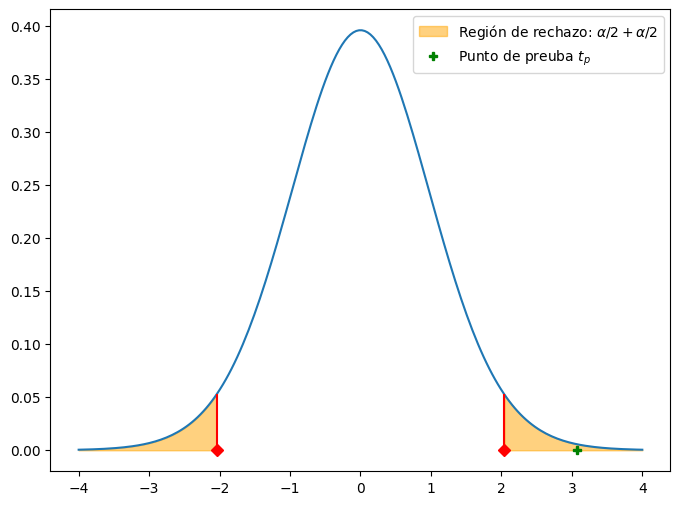

In [7]:
from scipy.stats import t
from scipy.stats import ttest_1samp

muestra = np.array([20.70,27.46,22.15,19.85,21.29,24.75,
                    20.75,22.91,25.34,20.33,21.54,21.08,
                    22.14,19.56,21.10,18.04,24.12,19.95,
                    19.72,18.28,16.26,17.46,20.53,22.12,
                    25.06,22.44,19.08,19.88,21.39,22.33,25.79
                   ])

n = len(muestra)  # tamaño de muestra
df = n - 1  # grados de libertad
mu = 20  # media poblacional H_0
x_bar = muestra.mean()  # media muestral
s = muestra.std(ddof=1)  # desviaon desviación la muestra
tp = (x_bar - mu) / (s/np.sqrt(n))  # estadístico de prueba tp
alpha = 0.05

x = np.linspace(-4, 4, 200)
tx = t.pdf(x, df)  # pdf de t

plt.figure(figsize=(8,6))
plt.plot(x, tx)  # pdf

# Región crítica a partir de alpha
# Note que la prueba es de dos colas
tc_l = t.ppf(alpha/2, df)  # cola inferior alpha/2
tc_r = t.ppf(1-alpha/2, df)  # cola superior 1-alpha/2

# cola izquierda area: alpha/2
x_l = np.linspace(-4, tc_l)
plt.fill_between(x_l, t.pdf(x_l, df), color='orange', alpha=0.5)
plt.vlines(tc_l, 0, t.pdf(tc_l, df), color='red')
plt.plot(tc_l, 0, 'Dr')

# cola derecha area: alpha/2
x_r = np.linspace(tc_r, 4)
plt.fill_between(x_r, t.pdf(x_r, df), color='orange', 
                 alpha=0.5, label=r'Región de rechazo: $\alpha/2+\alpha/2$')
plt.vlines(tc_r, 0, t.pdf(tc_r, df), color='red')
plt.plot(tc_r, 0, 'Dr')

plt.plot(tp, 0, 'Pg', label=r'Punto de preuba $t_p$')
plt.legend()

p_value = 1-t.cdf(tp, df)
p_value = p_value*2  # multiplicamos por 2 ya que es un pruba de 2 colas

Conclusion = {False: "No rechace H0", True: "Rechace H0"}  # Para xp<xc
print({'tp': tp, 'tcr': tc_r, 'decision': Conclusion[tp>tc_r]})
print({'p_value': p_value, 'alpha': alpha, 'decision': Conclusion[p_value<alpha]})

# Python implementa la prueba t para una muestra
# prueba de dos colas alternative='two-sided'
# alternative: {'two-sided', 'less', 'greater'}
ttest_1samp(muestra, popmean=20, alternative='two-sided')

<a id="pairedtest"></a>
### Prueba t para datos pareados

[Volver al índice](#toc)

- Toda nuestra teoría requiere la independencia de las medidas, hemos presentado ya como solventar esto para datos pareados cuando construimos el intervalo de confianza equivalente para
$$D = X - Y.$$ 
Lo conseguimos restando las dos medidas considerando las medidas independientes. 

- Entonces, nuestra hipótesis nula contempla una única media, que denotaremos como $\mu_D$, 
la media de las diferencias:

$$H_0: \mu_D = \mu_X - \mu_Y = 0$$

- Ya podemos usar la prueba t de una media para realizar la prueba de hipótesis. En esta situación, nuestras medidas son diferencias $d_i$ cuya media es $\bar{d}$ y su desviación estandar es $s_D$. 

- Formulación:
  
| <div style="width:100px">Cola inferior</div>      | <div style="width:100px">Cola superior</div> | <div style="width:100px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \mu_D = 0$     | $H_0:\ \mu_D = 0$      | $H_0:\ \mu_D = 0$  |
| $H_1:\ \mu_D < 0$  | $H_1:\ \mu_D > 0$        | $H_0:\ \mu_D \neq 0$ |

- Estadístico de prueba:

$$t_p=\frac{\bar{d}}{s_D / \sqrt{n}} \sim t_{n-1}.$$

- Conclusión:

| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:240px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $t_p < t_{(\alpha, n-1)}$  | $t_p > t_{(1-\alpha, n-1)}$ | $t_p < t_{(\alpha/2, n-1)}$ o $t_p > t_{(1-\alpha/2,n-1)}$    |



### Ejemplo

Los participantes de un estudio usaron margarina Clora durante 4 semanas. Su colesterol (en mmol/L) se midió antes de la dieta especial, y después de 4 semanas. Lleve a cabo una prueba t pareada para comprobar si el uso de margarina Clora durante 4 semanas cambia los niveles de colesterol.

- Vea el siguiente [enlace](https://www.sheffield.ac.uk/polopoly_fs/1.885203!/file/96_Paired_ttest.pdf)

- Formulación: 

$$H_0: \mu_D = 0$$
$$H_0: \mu_D \neq 0$$

- Nivel de significancia: $\alpha=0.01$.

In [8]:
# index_col=0, indica que los datos contienen una columna (la 0) de índice
# el índice es un valor único 
# ejemplo: la cédula o código único del participante en el estudio
datos = pd.read_csv("data/colesterol.csv", index_col=0)
datos['diferencia'] =  datos['After4weeks'] - datos['Before']
datos

,Before,After4weeks,diferencia
Subject,,,
1,6.42,5.83,-0.59
2,6.76,6.20,-0.56
3,6.56,5.83,-0.73
4,4.80,4.27,-0.53
5,8.43,7.71,-0.72
6,7.49,7.12,-0.37
7,8.05,7.25,-0.80
8,5.05,4.63,-0.42
9,5.77,5.31,-0.46


In [9]:
datos.describe()

,Before,After4weeks,diferencia
count,18.000000,18.000000,18.000000
mean,6.407778,5.841667,-0.566111
std,1.191087,1.123352,0.155569
min,3.910000,3.700000,-0.850000
25%,5.740000,5.175000,-0.617500
50%,6.500000,5.830000,-0.575000
75%,7.217500,6.730000,-0.470000
max,8.430000,7.710000,-0.210000


In [10]:
# Python implementa este test
from scipy.stats import ttest_rel 

# alternative: {'two-sided', 'less', 'greater'}
ttest_rel(datos['After4weeks'], datos['Before'], alternative='two-sided')

TtestResult(statistic=-15.438872730914381, pvalue=1.9575345773928476e-11, df=17)

- Un valor $p$ muy bajo indica evidencia en contra de la hipótesis nula. 
$$p-value < \alpha.$$

- Hay evidencia significativa (p-value < 0.001) de un cambio en los niveles de colesterol. 
  - En promedio, los participantes redujeron su colesterol en 0.5661 mmol/L.

Prueba de hipótesis para la diferencia de medias cuando se muestrean dos poblaciones normales independientes con varianzas desconocidas pero iguales

<a id="varnotequal"></a>
### Prueba de hipótesis para la diferencia de medias cuando se muestrean dos poblaciones normales independientes con varianzas desconocidas pero iguales

[Volver al índice](#toc)

- Formulación:
  
| <div style="width:150px">Cola inferior</div>      | <div style="width:150px">Cola superior</div> | <div style="width:150px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \mu_X - \mu_Y = a$ | $H_0:\ \mu_X - \mu_Y = a$ | $H_0:\ \mu_X - \mu_Y = a$    |
| $H_1:\ \mu_X - \mu_Y < a$ | $H_1:\ \mu_X - \mu_Y > a$ | $H_0:\ \mu_X - \mu_Y \neq a$ |

- Estadístico de prueba:

$$t_p = \frac{\bar{X} - \bar{Y} - (\mu_X - \mu_Y)}{s_p \sqrt{\frac{1}{n_X} + \frac{1}{n_Y}} } \sim t_{(n_X+n_Y-2)}, \quad s_p=\sqrt{ \frac{s^2_X(n_X - 1) + s^2_Y(n_Y - 1)}{n_X + n_Y - 2} }$$

- Conclusión:

| <div style="width:130px">Cola inferior</div>      | <div style="width:130px">Cola superior</div> | <div style="width:260px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $t_p < t_{(\alpha, n_X+n_Y-2)}$  | $t_p > t_{(1-\alpha, n_X+n_Y-2)}$ | $t_p < t_{(\alpha/2, n_X+n_Y-2)}$ o $t_p > t_{(1-\alpha/2,n_X+n_Y-2)}$    |

- Ejemplo: 

Una forma de medir el estado físico de una persona es medir su porcentaje de grasa corporal. Los porcentajes promedio de grasa corporal varían según la edad, pero según algunas pautas, el rango normal para los hombres es del 15 al 20% de grasa corporal y el rango normal para las mujeres es del 20 al 25% de grasa corporal.

Nuestros datos de muestra son de un grupo de hombres y mujeres que realizan ejercicio en un gimnasio tres veces por semana durante un año. El entrenador midió la grasa corporal. La siguiente tabla muestra los datos.

- Vea la [fuente](https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test/two-sample-t-test.html).

$$H_0: \mu_{mujer} - \mu_{hombre} = 0$$
$$H_0: \mu_{mujer} - \mu_{hombre} \neq 0$$

- Nivel de significancia $\alpha=0.05$.

In [11]:
datos = pd.read_csv("data/body_fat.csv")
datos.groupby('Group').describe()

Body_Fat_Percentages                                                 \
                     count       mean       std   min     25%   50%   75%   
Group                                                                       
Men                   13.0  14.946154  6.842589   1.0  13.300  15.0  19.0   
Women                 10.0  22.290000  5.319660  12.0  21.175  22.5  25.3   

             
        max  
Group        
Men    25.0  
Women  30.0

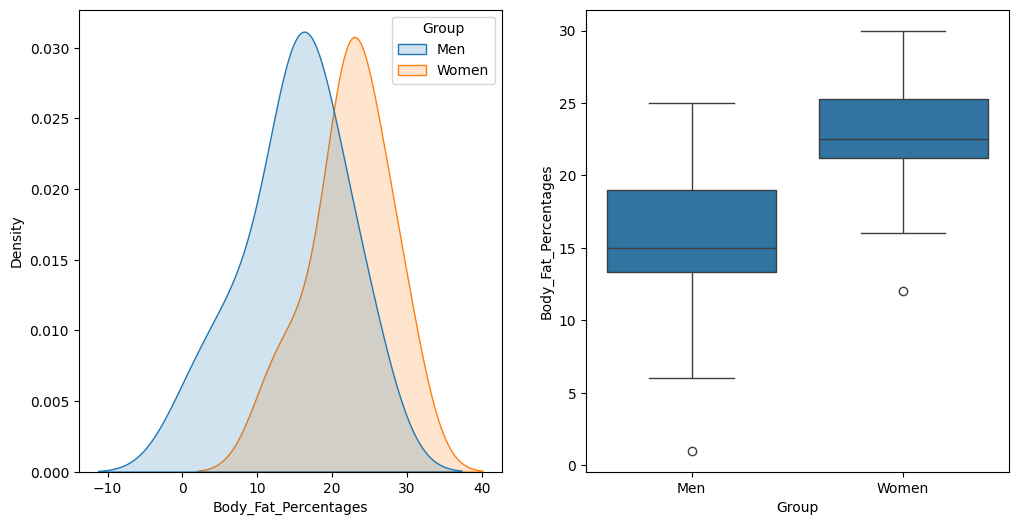

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.kdeplot(data=datos, x="Body_Fat_Percentages", hue="Group", 
            fill=True, common_norm=True, alpha=0.2, ax=axes[0])

b = sns.boxplot(data=datos, x="Group", y="Body_Fat_Percentages", ax=axes[1])

In [13]:
from scipy.stats import ttest_ind

# filtramos datos
hombres = datos[datos['Group']=='Men']['Body_Fat_Percentages']
mujeres = datos[datos['Group']=='Women']['Body_Fat_Percentages']

mx = mujeres.mean()
my = hombres.mean()

# Asumimos varianzas iguales equal_var=True
# y prueba de dos colas alternative='two-sided'
# alternative: {'two-sided', 'less', 'greater'}
ttest_ind(mujeres, hombres, 
          equal_var=True, alternative='two-sided'), "Diferencia", mx - my

(TtestResult(statistic=2.799960442832919, pvalue=0.010730607904197957, df=21.0),
 'Diferencia',
 7.343846153846153)

- Dado que el $p$-value < 0.05, rechazamos la hipótesis nula de que la grasa corporal media para hombres y mujeres es igual, y concluimos que tenemos evidencia de que la grasa corporal en la población es diferente entre hombres y mujeres.
  - La diferencia promedio es de 7.3438% de grasa corporal.

<a id="welchttest"></a>
### Prueba de hipótesis para la diferencia de medias cuando se muestrean dos poblaciones normales independientes cunado las varianzas no son iguales (Welch's t-test)

[Volver al índice](#toc)

- Formulación:
  
| <div style="width:150px">Cola inferior</div>      | <div style="width:150px">Cola superior</div> | <div style="width:150px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \mu_X - \mu_Y = a$ | $H_0:\ \mu_X - \mu_Y = a$ | $H_0:\ \mu_X - \mu_Y = a$    |
| $H_1:\ \mu_X - \mu_Y < a$ | $H_1:\ \mu_X - \mu_Y > a$ | $H_0:\ \mu_X - \mu_Y \neq a$ |

- Estadístico de prueba:

$$t_p = \frac{\bar{X} - \bar{Y} - (\mu_X - \mu_Y)}{\sqrt{\frac{s^2_X}{n_X} + \frac{s^2_Y}{n_Y}} } \sim t_{(r)}, \quad 
r= \frac{ 
\left( \frac{s^2_X}{n_X} + \frac{s^2_Y}{n_Y} \right)^2 } 
{\frac{(s^2_X/n_X)^2}{n_X-1} + \frac{(s^2_Y/n_Y)^2}{n_Y-1}} $$

- Conclusión:

| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:200px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $t_p < t_{(\alpha, r)}$  | $t_p > t_{(1-\alpha, r)}$ | $t_p < t_{(\alpha/2, r)}$ o $t_p > t_{(1-\alpha/2,r)}$    |

In [14]:
mx = mujeres.mean()
my = hombres.mean()

# Asumimos varianzas iguales equal_var=True
# y prueba de dos colas alternative='two-sided'
# alternative: {'two-sided', 'less', 'greater'}
ttest_ind(mujeres, hombres, 
          equal_var=False, alternative='two-sided'), "Diferencia", mx - my

(TtestResult(statistic=2.8957935572829467, pvalue=0.008649760076182724, df=20.988799905638157),
 'Diferencia',
 7.343846153846153)

- Dado que el $p$-value < 0.05, rechazamos la hipótesis nula de que la grasa corporal media para hombres y mujeres es igual, y concluimos que tenemos evidencia de que la grasa corporal en la población es diferente entre hombres y mujeres.

  - La diferencia promedio es de 7.3438% de grasa corporal.

<a id="twovars"></a>
### Prueba de hipótesis para las varianzas cuando se muestrean dos poblaciones normales independientes.

[Volver al índice](#toc)

- Formulación:
  
| <div style="width:100px">Cola inferior</div>      | <div style="width:100px">Cola superior</div> | <div style="width:100px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \sigma^2_X = \sigma^2_Y$     | $H_0:\ \sigma^2_X = \sigma^2_Y$ | $H_0:\ \sigma^2_X = \sigma^2_Y$  |
| $H_1:\ \sigma^2_X < \sigma^2_Y$  | $H_1:\ \sigma^2_X > \sigma^2_Y$        | $H_0:\ \sigma^2_X \neq \sigma^2_Y$ |

- Estadístico de prueba:

$$F_p=\frac{s^2_X}{s^2_Y} \sim F_{(n_X-1, n_Y-1)}.$$

- Conclusión:

| <div style="width:160px">Cola inferior</div>      | <div style="width:160px">Cola superior</div> | <div style="width:300px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $F_p < F_{(\alpha, n_X-1, n_Y-1)}$  | $F_p > F_{(1-\alpha, n_X-1, n_Y-1)}$ | $F_p < F_{(\alpha/2, n_X-1, n_Y-1)}$ o $F_p > F_{(1-\alpha/2,n_X-1, n_Y-1)}$    |




In [15]:
# importamos distribución F
from scipy.stats import f

def f_test(*args, alpha=0.05, alternative='two-sided'):
    # *args: array o lista
    if len(args) == 2:
        x = np.array(args[0])
        y = np.array(args[1])
        dfx = x.size-1  # define grados de libertad del numerador 
        dfy = y.size-1  # define grados de libertad del denominador 
        fp = np.var(x, ddof=1)/np.var(y, ddof=1)  # calcula F test statistic 
    # *args: varianzas
    else:
        fp = args[0] / args[1]  # calcula F test statistic
        nx = args[2]
        ny = args[3]
        dfx = nx-1  # define grados de libertad del numerador
        dfy = ny-1  # define grados de libertad del denominador 
    
    alpha_c = alpha
    if alternative=='two-sided': alpha_c = alpha_c / 2
    f_critical = f.ppf(alpha_c, dfx, dfy), f.ppf(1-alpha_c, dfx, dfy)
    f_areas = f.cdf(fp, dfx, dfy), 1-f.cdf(fp, dfx, dfy)  # areas colas
    
    colas = {'less': {'p-value': f_areas[0], "f-value": f_critical[0]}, 
             'greater': {'p-value': f_areas[1], "f-value": f_critical[1]},
             'two-sided': {'p-value': min(f_areas)*2, "f-value": f_critical}
            }
    return {"F-test result": {"statistic": fp, 
                       "p-value": colas[alternative]['p-value']},
                       "f-value": colas[alternative]['f-value'],
                       "alpha": alpha}

f_test(mujeres, hombres)

{'F-test result': {'statistic': 0.604403201133248,
  'p-value': 0.45612785705453396},
 'f-value': (0.2585168156256846, 3.435845641861058),
 'alpha': 0.05}

- Dado que el $p-value>\alpha$ no tenemos evidencia suficiente para rechazar la hipótesis nula. 
  - Por tanto podemos considerar que las varianzas son iguales y realizar el test correspondiente para diferencia de medias cuando las varianzas son iguales.

### Ejemplo

- Se han registrado dos conjuntos de observaciones. En la primera muestra, se tienen los resultados de una prueba a estudiantes de colegios públicos. En la segunda muestra, se tienen los resultados de una prueba a estudiantes de colegios privados.

  - Existe evidencia para decir que la varianza de los colegios privados es menor a la de los colegios púbicos. Use un nivel de significancia de $\alpha=0.05$.

In [16]:
datos = pd.read_csv("data/notas.csv")
# debemos transformar los datos para graficar
# pasamos de formato wide a long
datos_melted = pd.melt(datos)
# renombramos columnas
datos_melted.rename(columns={'variable': 'Colegio', 'value': 'Nota'}, inplace=True)
datos_melted.groupby('Colegio').var()  # varianza

,Nota
Colegio,
Privado,142.092857
Publico,96.791714


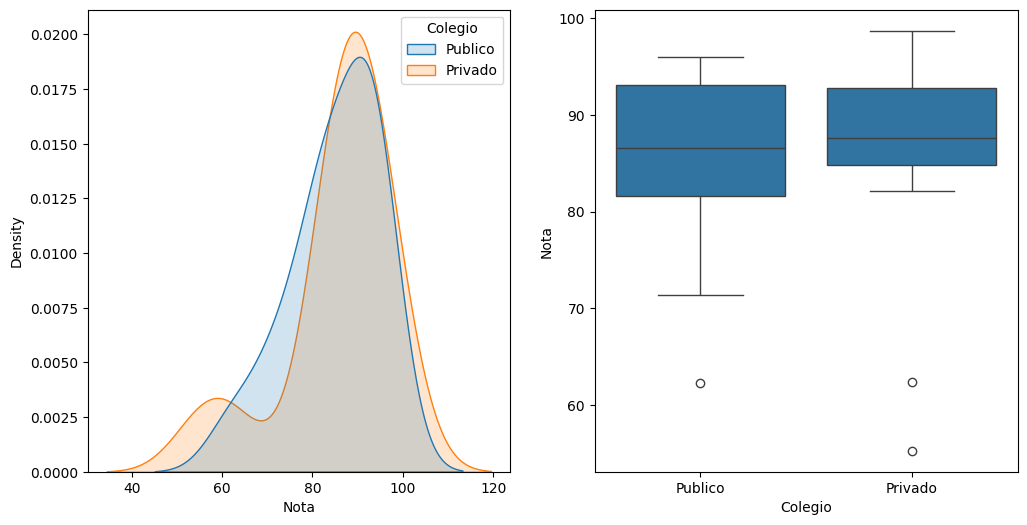

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.kdeplot(data=datos_melted, x="Nota", hue="Colegio", 
            fill=True, common_norm=True, alpha=0.2, ax=axes[0])

b = sns.boxplot(data=datos_melted, x="Colegio", y="Nota", ax=axes[1])

In [18]:
# Para la prueba usamos el formato wide
# de usar el long deberiamos filtrar
f_test(datos['Privado'], datos['Publico'], alternative="less")

{'F-test result': {'statistic': 1.4680270743363513,
  'p-value': 0.7591082413702556},
 'f-value': 0.40262094298131085,
 'alpha': 0.05}

- No existe evidencia para decir que la varianza de los colegios privados es menor a la de los colegios púbicos con un nivel de significancia de $\alpha=0.05$.

### Ejemplo

- Vea: https://online.stat.psu.edu/stat415/lesson/12/12.2
    
Un psicólogo realizó una encuesta aleatoria
$n_v=34$ estudiantes universitarios hombres y un azar
$n_m=29$ estudiantes mujeres universitarias. 
Aquí hay un resumen descriptivo de los resultados de su encuesta:  

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/FastestDrivenData.png)

Hay suficiente evidencia con un $\alpha=0.05$, para concluir que existe diferencia en la varianza entre hombres y mujeres.

In [19]:
f_test(12.2**2, 20.1**2, 29, 34, alternative="two-sided")

{'F-test result': {'statistic': 0.368406722605876,
  'p-value': 0.008568585406633605},
 'f-value': (0.478689932486996, 2.044072894606612),
 'alpha': 0.05}

- Rechazamos la hipótesis nula a favor de la hipótesis alternativa. Hay pruebas suficientes en el $\alpha=0.05$ nivel para concluir que las varianzas de la población no son iguales.

<a id="onevar"></a>

### Prueba de hipótesis para la varianza cuando se muestrea una distribución normal

[Volver al índice](#toc)

- Formulación:
  
| <div style="width:100px">Cola inferior</div>      | <div style="width:100px">Cola superior</div> | <div style="width:100px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ \sigma^2 = \sigma^2_0$     | $H_0:\ \sigma^2 = \sigma^2_0$ | $H_0:\ \sigma^2 = \sigma^2_0$  |
| $H_1:\ \sigma^2 < \sigma^2_0$  | $H_1:\ \sigma^2 > \sigma^2_0$        | $H_0:\ \sigma^2 \neq \sigma^2_0$ |

- Estadístico de prueba:

$$\chi^2_p=\frac{s^2}{\sigma^2_0}(n-1) \sim \chi^2_{(n-1)}.$$

- Conclusión:

| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:260px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $\chi^2_p < \chi^2_{(\alpha, n-1)}$  | $\chi^2_p > \chi^2_{(1-\alpha, n-1)}$ | $\chi^2_p < \chi^2_{(\alpha/2, n-1)}$ o $\chi^2_p > \chi^2_{(1-\alpha/2,n-1)}$    |


### Ejemplo

Un fabricante de cascos de seguridad para trabajadores de la construcción está preocupado por la media y la variación de las fuerzas que sus cascos transmiten a los usuarios cuando se someten a una fuerza externa. El fabricante ha diseñado los cascos para que la fuerza media transmitida por los cascos a los trabajadores sea de 800 libras (o menos) con una desviación estándar de menos de 40 libras. Las pruebas se realizaron en una muestra aleatoria de $n = 40$ cascos, y se encontró que la media de la muestra y la desviación estándar de la muestra eran 825 libras y 48.5 libras, respectivamente.

¿Proporcionan los datos suficiente evidencia, al nivel $\alpha=0.05$, para concluir que la desviación estándar de la población excede las 40 libras?

In [20]:
from scipy.stats import chi2

def chi2_test(popvar, s2, n, alternative="two-sided"):
    
    chi2p = (n-1)*s2 / popvar  # estadistico de prueba

    f_areas = chi2.cdf(chi2p, n-1), 1-chi2.cdf(chi2p, n-1)  # areas colas
    
    colas = {'less': {'p-value': f_areas[0]}, 
             'greater': {'p-value': f_areas[1]},
             'two-sided': {'p-value': min(f_areas)*2}
            }
    return {"chi2-test result": {"statistic": chi2p, 
                       "p-value": colas[alternative]['p-value']}}

chi2_test(40**2, 48.5**2, 40, alternative="greater")

{'chi2-test result': {'statistic': 57.33609375,
  'p-value': 0.029283675144775367}}

- Como $p-value=0.029 \leq 0.05$, rechazamos la hipótesis nula a favor de la hipótesis alternativa.

### Ejemplo

- Repitamos para una prueba de dos colas.

In [21]:
def chi2_test(popvar, s2, n, alternative="two-sided"):
    
    chi2p = (n-1)*s2 / popvar  # estadistico de prueba

    f_areas = chi2.cdf(chi2p, n-1), 1-chi2.cdf(chi2p, n-1)  # areas colas
    
    colas = {'less': {'p-value': f_areas[0]}, 
             'greater': {'p-value': f_areas[1]},
             'two-sided': {'p-value': min(f_areas)*2}
            }
    return {"chi2-test result": {"statistic": chi2p, 
                       "p-value": colas[alternative]['p-value']}}

chi2_test(40**2, 48.5**2, 40, alternative="two-sided")

{'chi2-test result': {'statistic': 57.33609375,
  'p-value': 0.058567350289550735}}

- Debido a que $p-value=0.058>0.05$, no podemos rechazar la hipótesis nula a favor de la hipótesis alternativa bilateral.

**El ejemplo anterior ilustra un hecho importante,** a saber, que la conclusión de la prueba unilateral no siempre concuerda con la conclusión de la prueba bilateral. **Si tiene razones para creer que el parámetro diferirá del valor nulo en una dirección particular, debe realizar la prueba unilateral.**

- Vea: https://online.stat.psu.edu/stat415/lesson/12/12.1

<a id="oneprop"></a>
### Prueba de hipótesis para la proporción

[Volver al índice](#toc)

- Formulación:
  
| <div style="width:100px">Cola inferior</div>      | <div style="width:100px">Cola superior</div> | <div style="width:100px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ p = p_0$ | $H_0:\ p = p_0$ | $H_0:\ p = p_0$  |
| $H_1:\ p < p_0$ | $H_1:\ p > p_0$ | $H_0:\ p \neq p_0$ |

- Estadístico de prueba:

$$z_p = \frac{\hat{p}- p_0}{\sqrt{\frac{p_0 (1-p_0)}{n}}}$$

- Conclusión:

| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:200px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $z_p < z_{\alpha}$  | $z_p > z_{1-\alpha}$ | $z_p < z_{\alpha/2}$ o $z_p > z_{1-\alpha/2}$ 

### Ejemplo

Sea $p$ igual a la proporción de conductores que usan cinturón de seguridad en un estado que no tiene una ley de uso obligatorio del cinturón de seguridad. Se afirmó que $p=0.14$. Se realizó una campaña publicitaria para aumentar esta proporción. Dos meses después de la campaña, 104 de una muestra aleatoria de n=590 conductores usaban cinturones de seguridad. ¿Fue exitosa la campaña?

- Vea: https://online.stat.psu.edu/stat415/lesson/9/9.2

In [22]:
def z_test_prop(count, nobs, popprop, alpha=0.05, alternative="two-sided"):
    # estadístico de prueba
    zp = (count/nobs - popprop)/np.sqrt(popprop*(1-popprop)/nobs)
    
    f_areas = norm.cdf(zp), 1-norm.cdf(zp)  # areas colas
    
    alpha_c = alpha
    if alternative=='two-sided': alpha_c = alpha_c / 2
    f_critical = norm.ppf(alpha_c), norm.ppf(1-alpha_c)
    f_areas = norm.cdf(zp), 1-norm.cdf(zp)  # areas colas
    
    colas = {'less': {'p-value': f_areas[0], "f-value": f_critical[0]}, 
             'greater': {'p-value': f_areas[1], "f-value": f_critical[1]},
             'two-sided': {'p-value': min(f_areas)*2, "f-value": f_critical}
            }
    return {"Proportion z-test": {"statistic": zp, 
                       "p-value": colas[alternative]['p-value']},
                       "z-value": colas[alternative]['f-value'],
                       "alpha": alpha}

z_test_prop(104, 590, 0.14, alpha=0.01, alternative="greater")

{'Proportion z-test': {'statistic': 2.5390691224460658,
  'p-value': 0.005557393050512838},
 'z-value': 2.3263478740408408,
 'alpha': 0.01}

- Rechazamos la hipótesis nula porque el estadístico de prueba cae en la región crítica, es decir, porque $Z=2.52>2.326$, podemos rechazar la hipótesis nula a favor de la hipótesis alternativa. Hay suficiente evidencia al nivel $\alpha=0.01$ para concluir que la campaña fue exitosa y la proporción es $p>0.14$.

<a id="twoprop"></a>
### Prueba de hipótesis para la diferencia de proporciones cuando se muestrean dos poblaciones independientes, no necesariamente normales, para muestras grandes ($n_X, n_Y \geq 30$) y varianzas conocidas

[Volver al índice](#toc)

- Formulación:
  
| <div style="width:150px">Cola inferior</div>      | <div style="width:150px">Cola superior</div> | <div style="width:150px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| $H_0:\ p_X - p_Y = a$ | $H_0:\ p_X - p_Y = a$ | $H_0:\ p_X - \mu_Y = a$    |
| $H_1:\ p_X - p_Y < a$ | $H_1:\ p_X - p_Y > a$ | $H_0:\ p_X - \mu_Y \neq a$ |

- Estadístico de prueba:

$$z_p = \frac{\hat{p}_X - \hat{p}_X - (p_X - p_Y)}
{
\sqrt{\hat{p} \hat{q} \left( \frac{1}{n_X} + \frac{1}{n_Y} \right) }
} \sim N(0,1), \quad 
\hat{p} = \frac{ x + y } 
{n_X + n_Y} $$

- Conclusión:


| <div style="width:120px">Cola inferior</div>      | <div style="width:120px">Cola superior</div> | <div style="width:200px">Dos colas</div>     |
| :---:        |    :----:   |          :---: |
| Recharzar $H_0$ cuando   | Recharzar $H_0$ cuando  | Recharzar $H_0$ cuando  |
| $z_p < z_{\alpha}$  | $z_p > z_{1-\alpha}$ | $z_p < z_{\alpha/2}$ o $z_p > z_{1-\alpha/2}$    |

### Ejemplo

La revista Time informó el resultado de una encuesta telefónica de 800 estadounidenses adultos. La pregunta planteada a los estadounidenses que fueron encuestados fue: ¿Debería aumentarse el impuesto federal sobre los cigarrillos para pagar la reforma del sistema de salud?

- Los resultados de la encuesta fueron:

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/time_survey.png)

  - ¿Hay suficiente evidencia en el $\alpha = 0.05$, por ejemplo, para concluir que las dos poblaciones (fumadores y no fumadores) difieren significativamente con respecto a sus opiniones?

In [23]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([351, 41])  # x, y: eventos favorables
nobs = np.array([605, 195])  # nx, ny: total de observaciones
stat, pval = proportions_ztest(count, nobs, alternative='two-sided')
{"statistic": stat, "p-value": pval}

{'statistic': 8.985900954503084, 'p-value': 2.566230446480293e-19}

- Hay evidencia suficiente al nivel de 0.05 para concluir que las dos poblaciones difieren con respecto a sus opiniones sobre la imposición de un impuesto federal para ayudar a pagar la reforma del sistema de salud.

<a id="chi2ba"></a>
### Prueba de Bondad de Ajuste

- La bondad de ajuste de un modelo estadístico describe qué tan bien se ajusta el modelo a un conjunto de observaciones. 
  - Las medidas de bondad de ajuste típicamente resumen la discrepancia entre los valores observados y los valores esperados bajo el modelo en cuestión.

[Volver al índice](#toc)

- Prueba de Hipótesis:

$$H_0: p_1=p_1*, p_2=p_2*, \dots, p_K=p_k*$$
$$H_1: \text{Al menos un } p_i \neq p_i*$$

- Estadístico:

$$Q_{(k-1)} = \sum_{i=1}^k \frac{(Y_i - n p_i)^2}{n p_i} \sim \chi^2_{k-1}$$

- Rechazar $H_0$ si $Q_{(k-1)} \geq \chi^2_{(1-\alpha, k-1)}$

### Ejemplo

- Un pseudo generador de números aleatorios (PRNG) genera dígitos entre 0 y 9 uniformemente distribuidos. 

- Pruebe 

$$H_0: p_0=1/10, p_1=1/10, p_2=1/10, \dots, p_{9}=1/10$$

- En la tabla tiene las frecuencias observadas $Y_i$ de cada dígito en una secuencia aleatoria de tamaño 100.
  - La frecuencia esperada $n p_i$ es 10 para cada dígito, dado que el PRNG sigue la [distribucion uniforme discreta](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) $X\sim U\{0,9\}$.


| $x_i$              |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |
|:-------------------|----:|----:|----:|----:|----:|----:|----:|----:|----:|----:|
| obs_freq ($Y_i$)   |   8 |   9 |   9 |  13 |  14 |   7 |  16 |   6 |  10 |   8 |
| exp_freq ($n p_i$) |  10 |  10 |  10 |  10 |  10 |  10 |  10 |  10 |  10 |  10 |

- Vea el ejemplo completo en [PRNG]( https://anaconda.org/marsgr6/pseudorandom_number_generator/notebook).

- Más [ejemplos](https://online.stat.psu.edu/stat415/lesson/16).

{'Q_p': 9.6, 'chi2_critico': 16.918977604620448, 'p-value': 0.3838265173713842, 'decision': 'Do not reject H0'}


,0,1,2,3,4,5,6,7,8,9
xi,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
obs_freq,8.0,9.0,9.0,13.0,14.0,7.0,16.0,6.0,10.0,8.0
exp_freq,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


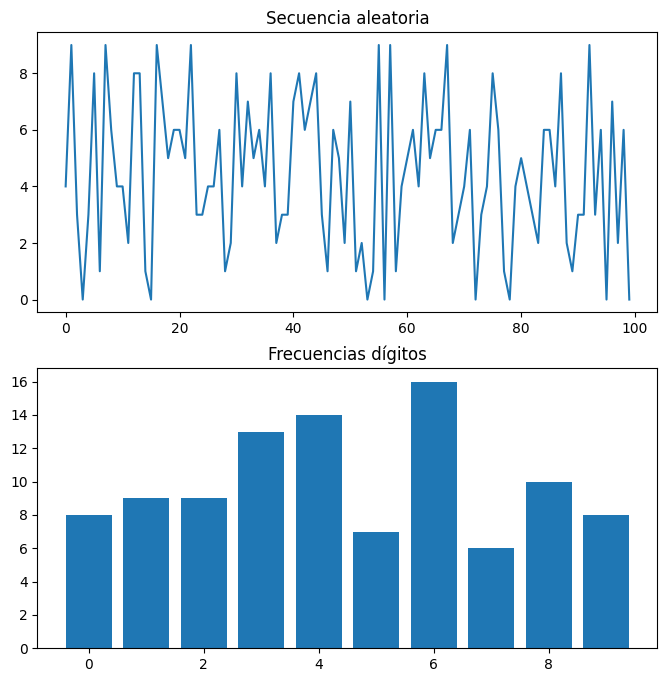

In [24]:
secuencia = np.loadtxt('data/pi_seq.txt')
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(secuencia)
plt.title("Secuencia aleatoria")
plt.subplot(212)
xi, o_f = np.unique(secuencia, return_counts=True)
plt.bar(xi, o_f)
plt.title("Frecuencias dígitos")

k = 10
p_i = 1/10
df = k - 1

n = len(secuencia)  # longitud de la serie observada
exp_freq = [int(n*p_i)]*10

datos = pd.DataFrame({'xi': xi, 'obs_freq': o_f, 'exp_freq': exp_freq})

alpha = 0.05
Q_p = ((datos['obs_freq'] - datos['exp_freq'])**2 / datos['exp_freq']).sum()
chi2_c = chi2.ppf(1-alpha, df)
decision = {True: "Reject H0", False: "Do not reject H0"}
pvalue = 1-chi2.cdf(Q_p, df)
print({"Q_p": Q_p, "chi2_critico": chi2_c, "p-value": pvalue,
       "decision": decision[Q_p > chi2_c]})
datos.transpose()

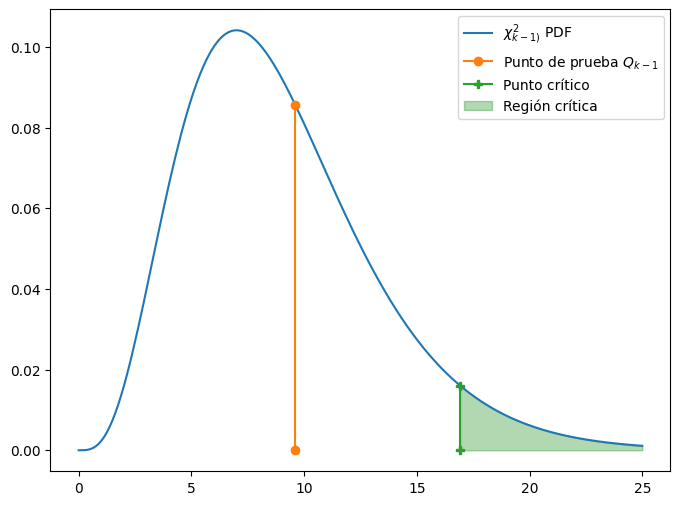

In [25]:
x = np.linspace(0,25,200)
fx = chi2.pdf(x, df)

plt.figure(figsize=(8,6))
plt.plot(x, fx, label=r"$\chi^2_{k-1)}$ PDF")
plt.plot([Q_p, Q_p], [0, chi2.pdf(Q_p, df)],
         '-o', label=r"Punto de prueba $Q_{k-1}$")  # linea naranja
plt.plot([chi2_c, chi2_c], [0, chi2.pdf(chi2_c, df)],
         '-P', label="Punto crítico")  # linea verde
x_chi = np.linspace(chi2_c,25)
plt.fill_between(x_chi, chi2.pdf(x_chi, df), 
                 color="green", alpha=0.3, label="Región crítica")
l=plt.legend()

In [26]:
# Pythom implementa esta prueba
from scipy.stats import chisquare

chisquare(datos['obs_freq'], datos['exp_freq'])

Power_divergenceResult(statistic=9.6, pvalue=0.3838265173713841)

- Nuestro ejemplo es para un modelo discreto $X\sim U\{0,9\}$. Esta prueba puede aplicarse también en el caso de un modelo continuo. 

<a id="chi2ind"></a>
### Prueba de independecia Chi-cuadrado (Chi-Square Test of Independence)

[Volver al índice](#toc)

- Podemos probar la independencia de dos variables categóricas mediante el Test Chi-Cuadrado de Independencia.

- Como con todas las pruebas estadísticas anteriores, necesitamos definir hipótesis nulas y alternativas. Además, como hemos aprendido, la hipótesis nula es lo que se supone que es cierto hasta que tengamos evidencia para ir en contra. 

- Estamos interesados en investigar si dos variables categóricas están relacionadas o asociadas (es decir, son dependientes). Por lo tanto, hasta que tengamos evidencia que sugiera que lo son, debemos asumir que no lo son. 

- Esta es la motivación detrás de la hipótesis de la prueba de independencia Chi-Cuadrado:


$$H_0: \text{ En la población, las dos variables categóricas son independientes.}$$

$$H_1: \text{ En la población, las dos variables categóricas son dependientes.}$$

- Una vez que hemos recopilado nuestros datos, los resumimos en una tabla de contingencia. Esta tabla representa los conteos observados y se denomina Tabla de conteos observados o simplemente Tabla observada. 

  - Ejemplo de tabla de contingencia Género vs. Está dispuesto a pagar más por transporte público eléctrico (NO/SI):
  
| género        |   NO        |   SI        |   Total fila |
|:--------------|------------:|------------:|-------------:|
| Hombre        |   29(22.70) |   34(40.30) |    63        |
| Mujer         |   11(17.30) |   37(30.70) |    48        |
| Total columna |   40        |   71        |   111        |

- Tabla esperada:

  - Cada celda de la tabla esperada se calcula como:
  
  $$E = \frac{(\text{Total fila})(\text{Total columna})}{\text{Total muestra}}$$
  
  - Compruebe este calculo para la tabla anterior. Los valores en parentesis son los valores esperados. Por ejemplo la celda (1,1) es:
  
  $$E_{1,1} = \frac{(40)(63)}{11}=22.7027$$
  
  
- Usamos el mismo estadístico y mismo criterio que en la prueba de bondad de ajuste.

  - Vea: https://online.stat.psu.edu/stat500/lesson/8/8.1

In [27]:
datos = pd.read_csv("data/survey_EVs_en.csv")
pd.crosstab(datos['gender'], 
                            datos['pay_more_no_gas'],
                                margins = True)

pay_more_no_gas,NO,SI,All
gender,,,
Hombre,29,34,63
Mujer,11,37,48
All,40,71,111


In [28]:
from scipy.stats import chi2_contingency

# Tabla de contingencia
ct = pd.crosstab(datos['gender'], 
                            datos['pay_more_no_gas'],
                                margins = False)


statistic, pvalue, df, exp_table = chi2_contingency(ct)

{"statistic": statistic, "pvalue": pvalue, "df": df, "exp_table": exp_table}

{'statistic': 5.352047440895375,
 'pvalue': 0.02069795185866291,
 'df': 1,
 'exp_table': array([[22.7027027, 40.2972973],
        [17.2972973, 30.7027027]])}

- La disposición a pagar más por transporte público eléctrico es independiente entre hombres y mujeres.
- Este test sería análogo a una prueba de dos proporciones en el que encontraría que la proporción de mujeres dispuestas a pagar más es mayor que la proporción de hombres.

<a id="fph"></a>

### Resumen de fórmulas

- Ver __[resumen de fórmulas](https://drive.google.com/open?id=1C6Wq9MOQGWNzBwCK8w-DB5NnsY_Mn4Lv)__ para pruebas de hipótesis.

[Volver al índice](#toc)

<img align="left" width="80px" src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/activity.png">

<br/>

### Experimente
<br/>

### ANOVA

- Investigue el análisis de varianza (ANOVA) de un factor. Este es un método estadístico para examinar las diferencias para las medias entre grupos.
  - Sources:
    - https://online.stat.psu.edu/stat415/lesson/13
    - https://www.reneshbedre.com/blog/anova.html

### Estimación de máxima verosimilitud

- Con anterioridad hemos hecho referencia a estimación de máxima verosimilitud, investigue acerca de estimación de máxima verosimilitud.
  - Sources:
    - https://newonlinecourses.science.psu.edu/stat414/node/289/
    - https://newonlinecourses.science.psu.edu/stat414/node/290/
    
    
### Distribution fitting 
- [En Python](https://anaconda.org/marsgr6/distribution_fitting_python/notebook)
- [En R](https://anaconda.org/marsgr6/distribution_fitting_r/notebook)